<a href="https://colab.research.google.com/github/sungjin-kim-data/ML/blob/master/RandomForest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [104]:
from sklearn.datasets import load_digits

digits = load_digits()

In [105]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [106]:
data, target = digits["data"], digits["target"]

In [107]:
data[0], target[0]

(array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
        15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
        12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
         0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
        10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.]), 0)

In [108]:
data[0].shape

(64,)

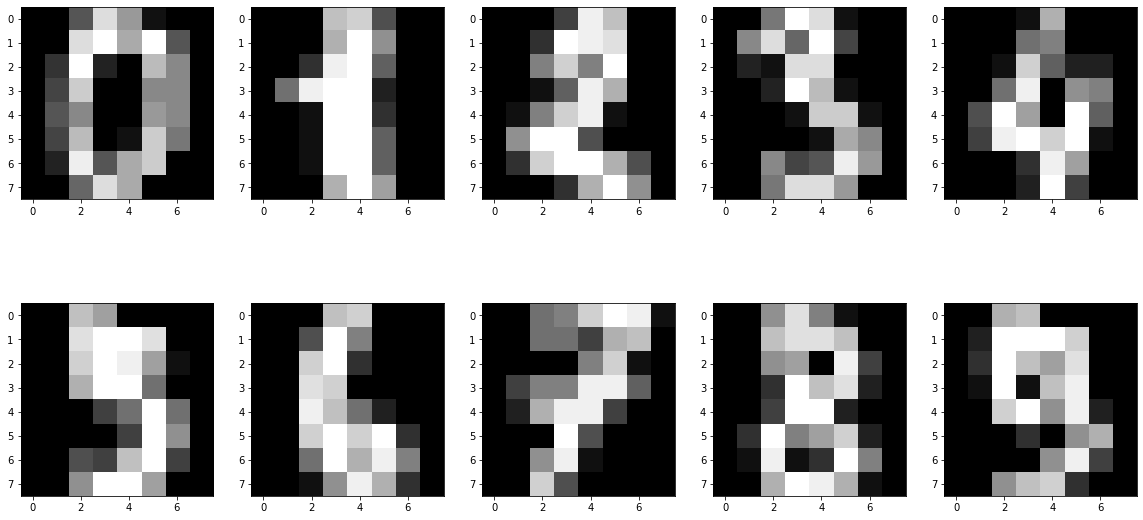

In [109]:
samples = data[:10].reshape(10, 8, 8)

fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(20, 10))
for idx, sample in enumerate(samples):
  axes[idx//5, idx%5].imshow(sample, cmap="gray")

In [110]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split (
    data, target, test_size=0.3, random_state=2
)

In [111]:
X_train.shape, X_test.shape

((1257, 64), (540, 64))

In [112]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()

In [113]:
rf.fit(X_train, y_train)

RandomForestClassifier()

In [114]:
# Feature Importance

In [115]:
feature_importance = pd.Series(rf.feature_importances_)

In [116]:
feature_importance.head(10)

0    0.000000
1    0.002562
2    0.019588
3    0.010258
4    0.010032
5    0.020262
6    0.007976
7    0.000512
8    0.000013
9    0.010741
dtype: float64

In [117]:
feature_importance = feature_importance.sort_values(ascending=False)

In [118]:
feature_importance.head(10)

21    0.047233
43    0.045176
26    0.041863
36    0.039748
28    0.036933
42    0.034222
13    0.032985
33    0.032048
20    0.031442
61    0.030108
dtype: float64

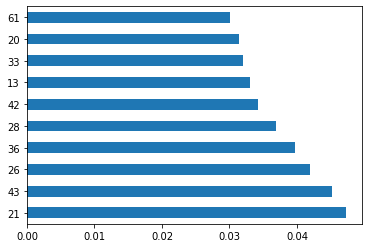

In [119]:
feature_importance.head(10).plot(kind='barh');

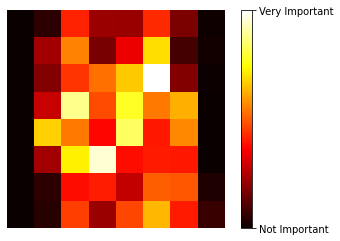

In [120]:
image = rf.feature_importances_.reshape(8, 8)

plt.imshow(image, cmap=plt.cm.hot, interpolation = "nearest")
cbar = plt.colorbar(ticks=[rf.feature_importances_.min(), rf.feature_importances_.max()])
cbar.ax.set_yticklabels(["Not Important", "Very Important"])
plt.axis("off");

In [121]:
train_pred = rf.predict(X_train)
test_pred = rf.predict(X_test)

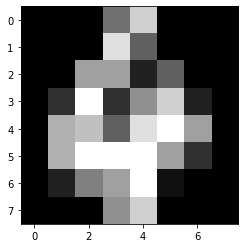

In [122]:
plt.imshow(X_train[4].reshape(8, 8), cmap="gray");

In [123]:
train_pred[4]

4

In [124]:
from sklearn.metrics import accuracy_score

train_acc = accuracy_score(y_train, train_pred)
test_acc = accuracy_score(y_test, test_pred)

In [125]:
print(f"train acc is {train_acc:.4f}")
print(f"test acc is {test_acc:.4f}")

train acc is 1.0000
test acc is 0.9574


In [126]:
from sklearn.model_selection import GridSearchCV

In [127]:
params = {
    "n_estimators" : [i for i in range(100, 1000, 200)],
    "max_depth" : [i for i in range(10, 50 ,10)]
}

In [128]:
grid = GridSearchCV(estimator=rf, param_grid=params, cv=5)
grid = grid.fit(X_train, y_train)

In [129]:
grid.best_score_

0.9809112755327896

In [130]:
grid.best_params_

{'max_depth': 30, 'n_estimators': 900}

In [131]:
best_rf = grid.best_estimator_

In [132]:
best_rf

RandomForestClassifier(max_depth=30, n_estimators=900)

In [133]:
train_pred_1 = best_rf.predict(X_train)
test_pred_1 = best_rf.predict(X_test)

In [134]:
train_acc_1 = accuracy_score(y_train, train_pred_1)
test_acc_1 = accuracy_score(y_test, test_pred_1)

In [135]:
print(f"train acc is {train_acc_1:.4f}")
print(f"test acc is {test_acc_1:.4f}")

train acc is 1.0000
test acc is 0.9611


In [136]:
feature_importance_rf = pd.Series(best_rf.feature_importances_)

In [137]:
feature_importance_rf = feature_importance_rf.sort_values(ascending=False)

In [138]:
feature_importance_rf.head(10)

21    0.050123
43    0.043354
36    0.041486
26    0.040532
42    0.034269
33    0.033776
28    0.033762
20    0.031434
61    0.029703
13    0.029372
dtype: float64

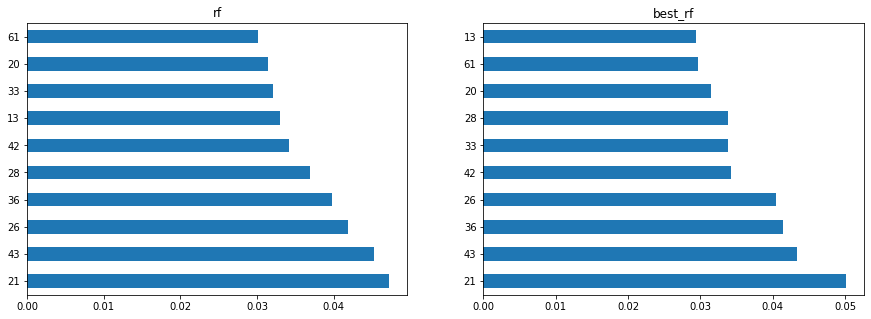

In [141]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
feature_importance.head(10).plot(kind='barh', ax = axes[0], title="rf")
feature_importance_rf.head(10).plot(kind='barh', ax = axes[1], title="best_rf");